# 카카오코테- 순위검색

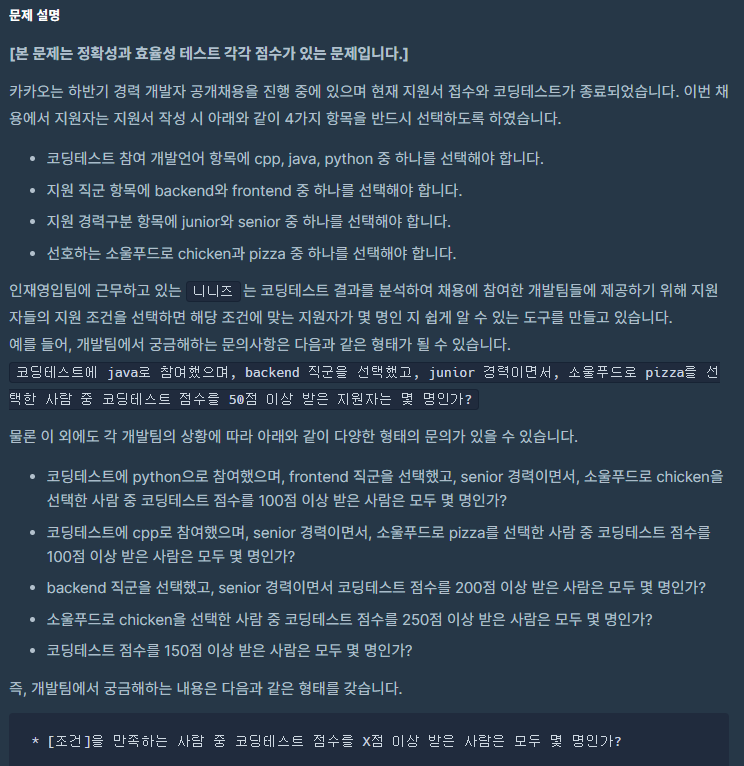

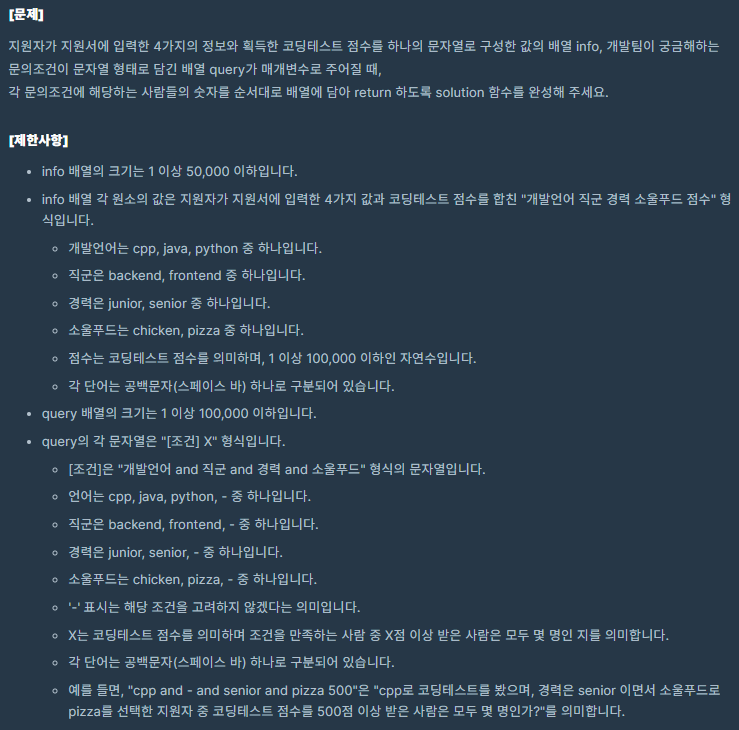

## 나의 풀이

처음에는 조건에 맞는 지원자를 찾는 루프를 짰지만
효율성을 절대 맞출 수 없음을 알고 info dict를 만들었다.

주석과 같이 쿼리가 들어올때 마다 sort를 해줘서 효율성을 통과못했다

query에 대해 루프를 돌기 전에 한번 정렬해주니 효율성까지 바로 통과할 수 있었다.

* bisect의 발견도 좋은점이다.
* 조건이 있다면 이분탐색을 직접 짜겠지만, 없다면 bisect를 이용하자

In [ ]:
from collections import defaultdict
import bisect


def solution(info, query):
    answer = []
    
    info_dict = defaultdict(list)
    
    for inf in info:
        language,end,exp,food,score = inf.split(' ')
        for a in [language,'-']:
            for b in [end,'-']:
                for c in [exp,'-']:
                    for d in [food,'-']:
                        info_dict[a+b+c+d].append(int(score))
    
    for k in info_dict:
        info_dict[k].sort()
        
    for q in query:
        
        jogun,q_score = q.replace(' and ','').split(' ')
        
        #info_dict[jogun].sort()
        
        lt = bisect.bisect_left(info_dict[jogun],int(q_score))
        answer.append(len(info_dict[jogun])-lt)
        
    return answer

## 참고 코드


In [ ]:
def solution(info, query):
    data = dict()
    for a in ['cpp', 'java', 'python', '-']:
        for b in ['backend', 'frontend', '-']:
            for c in ['junior', 'senior', '-']:
                for d in ['chicken', 'pizza', '-']:
                    data.setdefault((a, b, c, d), list())
    for i in info:
        i = i.split()
        for a in [i[0], '-']:
            for b in [i[1], '-']:
                for c in [i[2], '-']:
                    for d in [i[3], '-']:
                        data[(a, b, c, d)].append(int(i[4]))

    for k in data:
        data[k].sort()

        # print(k, data[k])

    answer = list()
    for q in query:
        q = q.split()

        pool = data[(q[0], q[2], q[4], q[6])]
        find = int(q[7])
        l = 0
        r = len(pool)
        mid = 0
        while l < r:
            mid = (r+l)//2
            if pool[mid] >= find:
                r = mid
            else:
                l = mid+1
            # print(l, r, mid, answer)
        # answer.append((pool, find, mid))
        answer.append(len(pool)-l)

    return answer